In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import seaborn as sns
sns.set()

In [2]:
#Create blobs with specific, enlongated shapes
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.5, random_state=2)

a = X[:,0]
b = X[:,0]-0.8
c = X[:,0]-1.6
d = X[:,0]-2.1
e = X[:,0]-2.7
f = X[:,0]-3.1
all_x2 = np.concatenate((a,b))
all_x2 = np.concatenate((all_x2,c))
all_x2 = np.concatenate((all_x2,d))
all_x2 = np.concatenate((all_x2,e))
all_x2 = np.concatenate((all_x2,f))

a2 = X[:,1]
b2 = X[:,1]+1.2
c2 = X[:,1]+2
d2 = X[:,1]+3
e2 = X[:,1]+4.2
f2 = X[:,1]+4.9
all_x1 = np.concatenate((a2,b2))
all_x1 = np.concatenate((all_x1,c2))
all_x1 = np.concatenate((all_x1,d2))
all_x1 = np.concatenate((all_x1,e2))
all_x1 = np.concatenate((all_x1,f2))

X_new = np.column_stack((all_x2,all_x1))

all_y = np.concatenate((y,y))
all_y = np.concatenate((all_y,y))
all_y = np.concatenate((all_y,y))
all_y = np.concatenate((all_y,y))
all_y = np.concatenate((all_y,y))

In [3]:
#Kmeans clustering
km = KMeans(n_clusters=3)
pred1 = km.fit_predict(X_new)

In [7]:
#Gaussian Mixture Clustering
gmm = GaussianMixture(n_components=3,covariance_type="full").fit(X_new)
pred2 = gmm.predict(X_new)

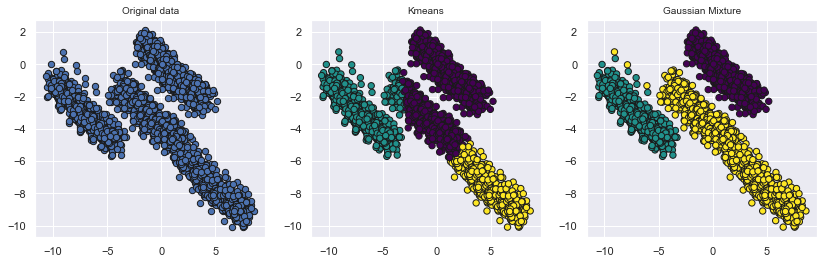

In [8]:
#Plot all
f = plt.figure(figsize=(14,4))
ax = plt.subplot(131)
ax.set_title("Original data", fontsize='small')
ax.scatter(X_new[:,1], X_new[:,0],s=40, cmap='viridis',edgecolors='k')

ax2 = plt.subplot(132)
ax2.set_title("Kmeans", fontsize='small')
ax2.scatter(X_new[:,1], X_new[:,0], c = pred1,s=40, cmap='viridis',edgecolors='k')

ax3 = plt.subplot(133)
ax3.set_title("Gaussian Mixture", fontsize='small')
ax3.scatter(X_new[:,1], X_new[:,0], c = pred2,s=40, cmap='viridis',edgecolors='k')
f.savefig('clustering_results.png')

In [6]:
#Predict on random new data
pred_new = gmm.predict_proba([[-5,-2]])
pred_new

array([[7.39965463e-02, 9.26003454e-01, 5.58745237e-24]])

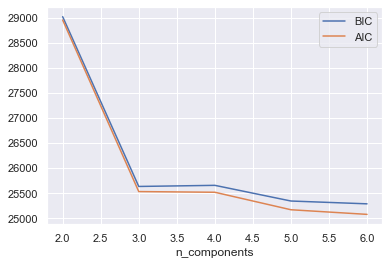

In [11]:
n_components = np.arange(2, 7)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_new)
          for n in n_components]

plt.plot(n_components, [m.bic(X_new) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_new) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')